<a href="https://colab.research.google.com/github/asrianda/jurnal/blob/main/program_Diana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('dataset.xlsx')
df.head()

,No,Desa Kelurahan,Kecamatan,Tahun,Jumlah Penduduk,Kebutuhan Beras kg,Kategori
0,1,Sitinjak,Angkola Barat,2023,4523,515635.569,Tinggi
1,2,Simatorkis Sisoma,Angkola Barat,2023,3239,369255.717,Tinggi
2,3,Panobasan,Angkola Barat,2023,2159,246132.477,Tinggi
3,4,Siuhom,Angkola Barat,2023,1674,190841.022,Tinggi
4,5,Sigumuru,Angkola Barat,2023,1214,138399.642,Rendah


In [ ]:
df.isnull().sum()

,0
No,0
Desa Kelurahan,0
Kecamatan,0
Tahun,0
Jumlah Penduduk,0
Kebutuhan Beras kg,0
Kategori,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No                  744 non-null    int64  
 1   Desa Kelurahan      744 non-null    object 
 2   Kecamatan           744 non-null    object 
 3   Tahun               744 non-null    int64  
 4   Jumlah Penduduk     744 non-null    int64  
 5   Kebutuhan Beras kg  744 non-null    float64
 6   Kategori            744 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 40.8+ KB


In [ ]:
df.columns = df.columns.str.replace(" ", "_")
df.head()

,No,Desa_Kelurahan,Kecamatan,Tahun,Jumlah_Penduduk,Kebutuhan_Beras_kg,Kategori
0,1,Sitinjak,Angkola Barat,2023,4523,515635.569,Tinggi
1,2,Simatorkis Sisoma,Angkola Barat,2023,3239,369255.717,Tinggi
2,3,Panobasan,Angkola Barat,2023,2159,246132.477,Tinggi
3,4,Siuhom,Angkola Barat,2023,1674,190841.022,Tinggi
4,5,Sigumuru,Angkola Barat,2023,1214,138399.642,Rendah


In [ ]:
df['Kategori'].value_counts()

,count
Kategori,
Rendah,481
Tinggi,263


In [ ]:
min=df['Jumlah_Penduduk'].min()
max=df['Jumlah_Penduduk'].max()
print(min)
print(max)

188
11524


In [ ]:
#df['Kebutuhan_Beras_kg'].value_counts()
min=df['Kebutuhan_Beras_kg'].min()
max=df['Kebutuhan_Beras_kg'].max()
print(min)
print(max)

21432.564
1298722.176


In [ ]:
bins=[21432.564,50000,100000,200000,500000,750000,1000000,1100000]
names=['21432-<50000','50000-<100000','100000-<200000','200000-<500000','500000-<750000',
       '750000-<1000000','1000000-<1100000','>1100000']
d = dict(enumerate(names, 1))
df['Kebutuhan_Beras_Range']=np.vectorize(d.get)(np.digitize(df['Kebutuhan_Beras_kg'],bins))
df['Kebutuhan_Beras_Range'].value_counts()

,count
Kebutuhan_Beras_Range,
100000-<200000,287
50000-<100000,275
200000-<500000,112
21432-<50000,57
500000-<750000,10
>1100000,3


In [ ]:
bins=[188,500,1000,3000,6000,9000]
names=['188-<500','500-<1000','1000-<3000','3000-<6000','6000-<9000','>9000']
d = dict(enumerate(names, 1))
df['Jumlah_Penduduk_Range']=np.vectorize(d.get)(np.digitize(df['Jumlah_Penduduk'],bins))
df['Jumlah_Penduduk_Range']

,Jumlah_Penduduk_Range
0,3000-<6000
1,3000-<6000
2,1000-<3000
3,1000-<3000
4,1000-<3000
...,...
739,500-<1000
740,500-<1000
741,500-<1000
742,500-<1000


In [ ]:
df = df.drop(columns=['Jumlah_Penduduk', 'Kebutuhan_Beras_kg'])
df=df.drop(columns=['No'])
df.head()

,Desa_Kelurahan,Kecamatan,Tahun,Kategori,Kebutuhan_Beras_Range,Jumlah_Penduduk_Range
0,Sitinjak,Angkola Barat,2023,Tinggi,500000-<750000,3000-<6000
1,Simatorkis Sisoma,Angkola Barat,2023,Tinggi,200000-<500000,3000-<6000
2,Panobasan,Angkola Barat,2023,Tinggi,200000-<500000,1000-<3000
3,Siuhom,Angkola Barat,2023,Tinggi,100000-<200000,1000-<3000
4,Sigumuru,Angkola Barat,2023,Rendah,100000-<200000,1000-<3000


In [ ]:
df.head()


,Desa_Kelurahan,Kecamatan,Tahun,Kategori,Kebutuhan_Beras_Range,Jumlah_Penduduk_Range
0,Sitinjak,Angkola Barat,2023,Tinggi,500000-<750000,3000-<6000
1,Simatorkis Sisoma,Angkola Barat,2023,Tinggi,200000-<500000,3000-<6000
2,Panobasan,Angkola Barat,2023,Tinggi,200000-<500000,1000-<3000
3,Siuhom,Angkola Barat,2023,Tinggi,100000-<200000,1000-<3000
4,Sigumuru,Angkola Barat,2023,Rendah,100000-<200000,1000-<3000


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Looping untuk mengubah semua kolom ke bentuk numerik
for col in df.columns:
    df[col] = le.fit_transform(df[col].astype(str))  # Konversi semua ke string dulu

print(df)

     Desa_Kelurahan  Kecamatan  Tahun  Kategori  Kebutuhan_Beras_Range  \
0               207          1      2         1                      4   
1               193          1      2         1                      1   
2               116          1      2         1                      1   
3               211          1      2         1                      0   
4               177          1      2         0                      0   
..              ...        ...    ...       ...                    ...   
739             113          2      0         0                      3   
740             139          2      0         0                      3   
741             214          2      0         0                      3   
742              97          2      0         0                      3   
743             228          2      0         0                      3   

     Jumlah_Penduduk_Range  
0                        2  
1                        2  
2                       

In [ ]:
df.to_excel('dataset_beras.xlsx',index=False)
from google.colab import files
files.download('dataset_beras.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Desa_Kelurahan,Kecamatan,Tahun,Kategori,Kebutuhan_Beras_Range,Jumlah_Penduduk_Range
0,Sitinjak,Angkola Barat,2023,Tinggi,500000-<750000,3000-<6000
1,Simatorkis Sisoma,Angkola Barat,2023,Tinggi,200000-<500000,3000-<6000
2,Panobasan,Angkola Barat,2023,Tinggi,200000-<500000,1000-<3000
3,Siuhom,Angkola Barat,2023,Tinggi,100000-<200000,1000-<3000
4,Sigumuru,Angkola Barat,2023,Rendah,100000-<200000,1000-<3000


In [ ]:
df.head()

,Desa_Kelurahan,Kecamatan,Tahun,Kategori,Kebutuhan_Beras_Range,Jumlah_Penduduk_Range
0,207,1,2,1,4,2
1,193,1,2,1,1,2
2,116,1,2,1,1,0
3,211,1,2,1,0,0
4,177,1,2,0,0,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from graphviz import Digraph
import math



# Menampilkan data untuk memverifikasi struktur
#print("Dataset awal:")
#print(df)

# Menentukan target dan fitur
target_column = 'Kategori'  # Kolom target (Kategori)
features = df.drop(columns=[target_column])

# Mengonversi kategori menjadi angka
label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

# Mengonversi target menjadi angka
y = label_encoder.fit_transform(df[target_column])

# Menstandarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(features)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====================
# C4.5 - DecisionTree
# ====================
class DecisionTreeC45:
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth  # Menambahkan batas kedalaman pohon

    def shannon_entropy(self, p, n):
        total = p + n
        if total == 0:
            return 0
        prob_p = p / total
        prob_n = n / total
        return -prob_p * np.log2(prob_p) - prob_n * np.log2(prob_n) if prob_p > 0 and prob_n > 0 else 0

    def calculate_gain_ratio(self, data, target, feature):
        total = len(target)
        p = np.sum(target == 1)
        n = np.sum(target == 0)

        initial_entropy = self.shannon_entropy(p, n)

        # Menggunakan .iloc untuk memilih kolom berdasarkan index
        values, counts = np.unique(data.iloc[:, feature], return_counts=True)
        weighted_entropy = 0
        split_info = 0

        for value, count in zip(values, counts):
            subset_target = target[data.iloc[:, feature] == value]
            p_subset = np.sum(subset_target == 1)
            n_subset = np.sum(subset_target == 0)
            weighted_entropy += (count / total) * self.shannon_entropy(p_subset, n_subset)

            if count / total > 0:
                split_info -= (count / total) * np.log2(count / total)

        info_gain = initial_entropy - weighted_entropy
        return info_gain / split_info if split_info != 0 else 0

    def fit(self, data, target):
        self.tree = self._build_tree(data, target, depth=0)

    def _build_tree(self, data, target, depth):
        # Cek jika sudah mencapai kedalaman maksimal
        if self.max_depth is not None and depth >= self.max_depth:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        # Kondisi jika target hanya memiliki satu nilai
        if target.nunique() == 1:
            return {'label': target.iloc[0]}

        # Jika tidak ada fitur yang tersisa untuk dipisah
        if data.shape[1] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        gains = [self.calculate_gain_ratio(data, target, i) for i in range(data.shape[1])]
        best_feature = np.argmax(gains)

        # Jika semua gainnya 0, berarti tidak ada fitur yang bisa membagi
        if gains[best_feature] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        tree = {'feature': best_feature, 'children': {}}
        values = np.unique(data.iloc[:, best_feature])  # Menggunakan iloc di sini

        for value in values:
            subset_data = data[data.iloc[:, best_feature] == value].copy()
            subset_target = target[data.iloc[:, best_feature] == value].copy()
            subtree = self._build_tree(subset_data, subset_target, depth + 1)
            tree['children'][value] = subtree

        return tree

    def predict(self, data):
        return np.array([self._predict_sample(self.tree, sample) for sample in data])

    def _predict_sample(self, tree, sample):
        if 'label' in tree:
            return tree['label']
        feature = tree['feature']
        value = sample[feature]
        if value in tree['children']:
            return self._predict_sample(tree['children'][value], sample)
        return 0  # Default if value not found in tree

    def plot_tree(self, tree=None, dot=None, parent_name=None):
        if dot is None:
            dot = Digraph()

        if tree is None:
            tree = self.tree

        if 'label' in tree:
            dot.node(str(id(tree)), f'Label: {tree["label"]}')
            if parent_name is not None:
                dot.edge(parent_name, str(id(tree)))
        else:
            feature = tree['feature']
            dot.node(str(id(tree)), f'Feature {feature}')
            if parent_name is not None:
                dot.edge(parent_name, str(id(tree)))

            for value, subtree in tree['children'].items():
                self.plot_tree(subtree, dot, str(id(tree)))

        return dot

# Melatih model
model = DecisionTreeC45(max_depth=10)  # Menambahkan batas kedalaman
model.fit(pd.DataFrame(X_train), pd.Series(y_train))

# Prediksi pada data pengujian
y_pred = model.predict(X_test)

# Perhitungan akurasi
accuracy = accuracy_score(y_test, y_pred)

# Laporan klasifikasi
classification_rep = classification_report(y_test, y_pred)

# Menampilkan struktur pohon keputusan sebagai grafik
#dot = model.plot_tree()

# Menyimpan grafik pohon ke file
#dot.render('decision_tree_c45', format='png', cleanup=True)

# Menampilkan pohon keputusan dalam bentuk grafik (harus membuka file decision_tree_c45.png)
#dot.view()

# Menampilkan laporan klasifikasi dan akurasi
print("Laporan Klasifikasi:")
print(classification_rep)

print(f"\nAkurasi: {accuracy:.4f}")


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        97
           1       0.98      0.96      0.97        52

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.98       149


Akurasi: 0.9799


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Pastikan 'df' sudah terdefinisi, misalnya:
# df = pd.read_csv('data.csv')

target_column = 'Kategori'
features = df.drop(columns=[target_column])

label_encoder = LabelEncoder()
for column in features.select_dtypes(include=['object']).columns:
    features[column] = label_encoder.fit_transform(features[column])

y = label_encoder.fit_transform(df[target_column])
scaler = StandardScaler()
X = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class DecisionTreeC45:
    def __init__(self, max_depth=None):
        self.tree = None
        self.max_depth = max_depth

    def shannon_entropy(self, p, n):
        total = p + n
        if total == 0:
            return 0
        prob_p = p / total
        prob_n = n / total
        return -prob_p * np.log2(prob_p) - prob_n * np.log2(prob_n) if prob_p > 0 and prob_n > 0 else 0

    def calculate_gain_ratio(self, data, target, feature):
        total = len(target)
        p = np.sum(target == 1)
        n = np.sum(target == 0)
        initial_entropy = self.shannon_entropy(p, n)

        values, counts = np.unique(data.iloc[:, feature], return_counts=True)
        weighted_entropy = 0
        split_info = 0

        for value, count in zip(values, counts):
            subset_target = target[data.iloc[:, feature] == value]
            p_subset = np.sum(subset_target == 1)
            n_subset = np.sum(subset_target == 0)
            weighted_entropy += (count / total) * self.shannon_entropy(p_subset, n_subset)
            if count / total > 0:
                split_info -= (count / total) * np.log2(count / total)

        info_gain = initial_entropy - weighted_entropy
        return info_gain / split_info if split_info != 0 else 0

    def fit(self, data, target):
        self.tree = self._build_tree(data, target, depth=0)

    def _build_tree(self, data, target, depth):
        if self.max_depth is not None and depth >= self.max_depth:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}
        if target.nunique() == 1:
            return {'label': target.iloc[0]}
        if data.shape[1] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        gains = [self.calculate_gain_ratio(data, target, i) for i in range(data.shape[1])]
        best_feature = np.argmax(gains)

        if gains[best_feature] == 0:
            label = np.round(np.mean(target)).astype(int)
            return {'label': label}

        tree = {'feature': best_feature, 'children': {}}
        values = np.unique(data.iloc[:, best_feature])
        for value in values:
            subset_data = data[data.iloc[:, best_feature] == value].copy()
            subset_target = target[data.iloc[:, best_feature] == value].copy()
            subtree = self._build_tree(subset_data, subset_target, depth + 1)
            tree['children'][value] = subtree
        return tree

    def predict(self, data):
        return np.array([self._predict_sample(self.tree, sample) for sample in data])

    def _predict_sample(self, tree, sample):
        if 'label' in tree:
            return tree['label']
        feature = tree['feature']
        value = sample[feature]
        if value in tree['children']:
            return self._predict_sample(tree['children'][value], sample)
        return 0

# ======== Evaluasi untuk kedalaman 1 sampai 15 ========
for depth in range(1, 16):
    model = DecisionTreeC45(max_depth=depth)
    model.fit(pd.DataFrame(X_train), pd.Series(y_train))
    y_pred = model.predict(X_test)

    print(f"\n=== Kedalaman Pohon: {depth} ===")
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))



=== Kedalaman Pohon: 1 ===
Akurasi: 0.8322

=== Kedalaman Pohon: 2 ===
Akurasi: 0.8322

=== Kedalaman Pohon: 3 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 4 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 5 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 6 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 7 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 8 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 9 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 10 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 11 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 12 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 13 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 14 ===
Akurasi: 0.9799

=== Kedalaman Pohon: 15 ===
Akurasi: 0.9799
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        97
           1       0.98      0.96      0.97        52

    accuracy                           0.98       149
   macro avg       0.98      0.98      0.98       149
weighted avg       0.98      0.98      0.

In [ ]:
df.shape

(744, 6)

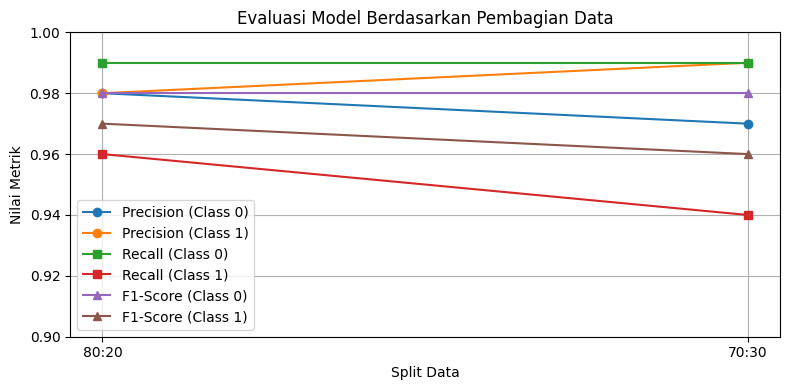

In [ ]:
import matplotlib.pyplot as plt

# Data
split_data = ['80:20', '70:30']
precision_0 = [0.98, 0.97]
precision_1 = [0.98, 0.99]
recall_0 = [0.99, 0.99]
recall_1 = [0.96, 0.94]
f1_0 = [0.98, 0.98]
f1_1 = [0.97, 0.96]

# Plotting
plt.figure(figsize=(8, 4))

# Precision
plt.plot(split_data, precision_0, label='Precision (Class 0)', marker='o')
plt.plot(split_data, precision_1, label='Precision (Class 1)', marker='o')

# Recall
plt.plot(split_data, recall_0, label='Recall (Class 0)', marker='s')
plt.plot(split_data, recall_1, label='Recall (Class 1)', marker='s')

# F1-score
plt.plot(split_data, f1_0, label='F1-Score (Class 0)', marker='^')
plt.plot(split_data, f1_1, label='F1-Score (Class 1)', marker='^')

plt.title('Evaluasi Model Berdasarkan Pembagian Data')
plt.xlabel('Split Data')
plt.ylabel('Nilai Metrik')
plt.ylim(0.90, 1.00)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


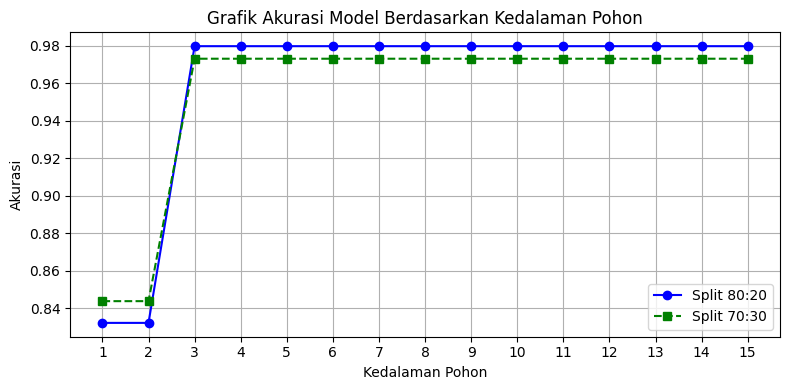

In [ ]:
import matplotlib.pyplot as plt

# Data
kedalaman = list(range(1, 16))
akurasi_8020 = [0.8322, 0.8322, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799, 0.9799]
akurasi_7030 = [0.8438, 0.8438, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732, 0.9732]

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(kedalaman, akurasi_8020, marker='o', linestyle='-', color='blue', label='Split 80:20')
plt.plot(kedalaman, akurasi_7030, marker='s', linestyle='--', color='green', label='Split 70:30')

# Label dan judul
plt.title('Grafik Akurasi Model Berdasarkan Kedalaman Pohon')
plt.xlabel('Kedalaman Pohon')
plt.ylabel('Akurasi')
plt.grid(True)
plt.legend()
plt.xticks(kedalaman)

# Tampilkan plot
plt.tight_layout()
plt.show()
